In [2]:
!pip install missingno lazypredict
!pip install tensorflow



Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import seaborn as sns

2024-10-08 18:51:51.640904: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 18:51:51.644863: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-08 18:51:51.651498: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-08 18:51:51.665274: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-08 18:51:51.669390: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-08 18:51:51.680630: I tensorflow/core/platform/cpu_feature_gu

In [4]:
df = pd.read_csv('/workspaces/AMH-proyecto-final_albaebauluz/data/DF_modelos/df_industrial_total.csv')

In [ ]:
df.head()

,Sector_Economic,consumo,año,fecha,findesemana,festivos,lectivos,COVID,tmed,prec,velmedia,poblacion,PIB,Empleo
0,Indústria,995989,2019.0,2019-01-01,0,1,0,0,8.590909,0.0,1.417647,5628011,14279,604200
1,Indústria,1702091,2019.0,2019-01-02,0,0,0,0,6.617391,0.3,2.152941,5628011,14279,604200
2,Indústria,1826076,2019.0,2019-01-03,0,0,0,0,5.604348,0.1,1.676471,5628011,14279,604200
3,Indústria,1806926,2019.0,2019-01-04,0,0,0,0,5.004348,0.0,1.335294,5628011,28632,604200
4,Indústria,1341548,2019.0,2019-01-05,1,0,0,0,6.173913,0.0,2.247059,5628011,28632,604200


## Paso 1: Preparación de los datos.

In [6]:
df.dtypes

Sector_Economic     object
consumo              int64
año                float64
fecha               object
findesemana          int64
festivos             int64
lectivos             int64
COVID                int64
tmed               float64
prec               float64
velmedia           float64
poblacion            int64
PIB                  int64
Empleo               int64
dtype: object

In [7]:
df.nunique()

Sector_Economic       1
consumo            1966
año                   6
fecha              2008
findesemana           2
festivos              2
lectivos              2
COVID                 3
tmed               1904
prec                540
velmedia           1092
poblacion            11
PIB                  38
Empleo               21
dtype: int64

In [8]:
print(df.isnull().sum())

Sector_Economic    39
consumo             0
año                39
fecha               0
findesemana         0
festivos            0
lectivos            0
COVID               0
tmed                0
prec                0
velmedia            0
poblacion           0
PIB                 0
Empleo              0
dtype: int64


In [9]:
df.shape

(2008, 14)

In [10]:
df = df.rename(columns={'Rentanetamediaporhogar': 'renta_hogar'})

TRANSFORMACIÓN DE LA VARIABLE FECHA

In [10]:
# Convertir la columna de fecha a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

df.fecha

0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-05
          ...    
2003   2024-06-26
2004   2024-06-27
2005   2024-06-28
2006   2024-06-29
2007   2024-06-30
Name: fecha, Length: 2008, dtype: datetime64[ns]

1. Convertir fechas a formato numérico (timestamp)

In [11]:
# Asegúrate de que la columna de fecha está en formato datetime
df['fecha'] = pd.to_datetime(df['fecha'], format='%Y')  # Ajusta el formato según tus datos

# Convertir la columna de fecha a timestamp
df['fecha'] = df['fecha'].astype(np.int64) // 10**9  # Convertir a dias



In [12]:
df.fecha

0       1546300800
1       1546387200
2       1546473600
3       1546560000
4       1546646400
           ...    
2003    1719360000
2004    1719446400
2005    1719532800
2006    1719619200
2007    1719705600
Name: fecha, Length: 2008, dtype: int64

In [13]:
df.head()

,Sector_Economic,consumo,año,fecha,findesemana,festivos,lectivos,COVID,tmed,prec,velmedia,poblacion,PIB,Empleo
0,Indústria,995989,2019.0,1546300800,0,1,0,0,8.590909,0.0,1.417647,5628011,14279,604200
1,Indústria,1702091,2019.0,1546387200,0,0,0,0,6.617391,0.3,2.152941,5628011,14279,604200
2,Indústria,1826076,2019.0,1546473600,0,0,0,0,5.604348,0.1,1.676471,5628011,14279,604200
3,Indústria,1806926,2019.0,1546560000,0,0,0,0,5.004348,0.0,1.335294,5628011,28632,604200
4,Indústria,1341548,2019.0,1546646400,1,0,0,0,6.173913,0.0,2.247059,5628011,28632,604200


ANÁLISIS DE DATOS ATÍPICOS EN LAS VARIABLES INDEPENDIENTES CONTINUAS

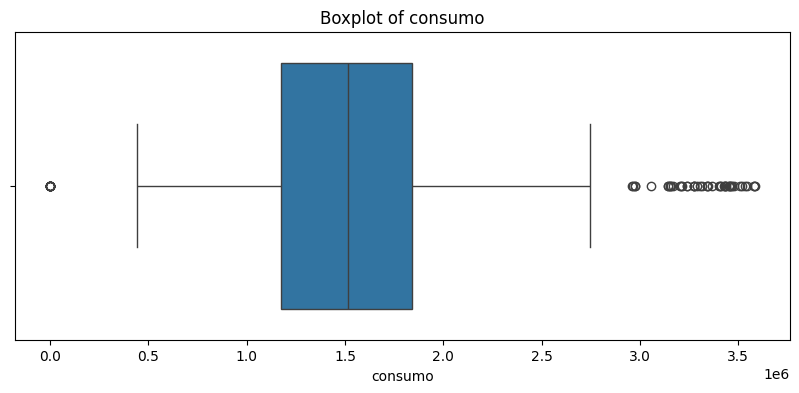

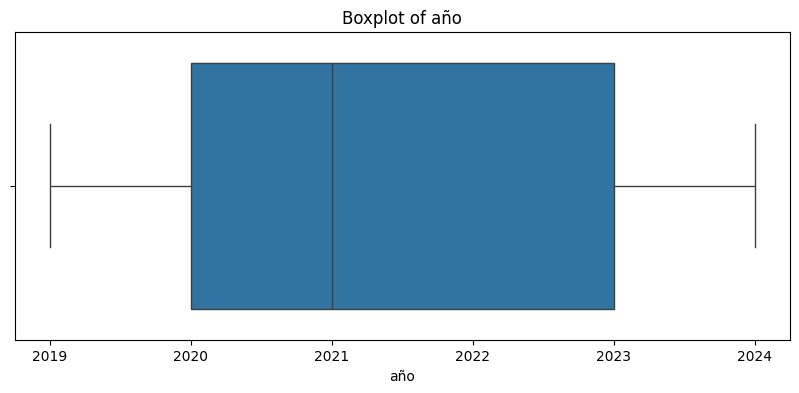

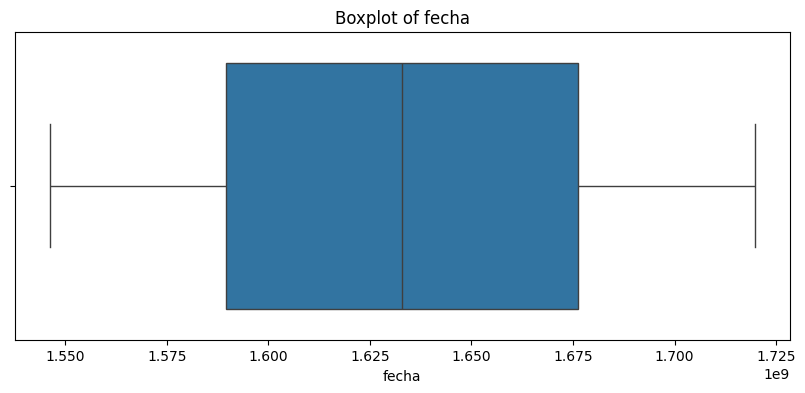

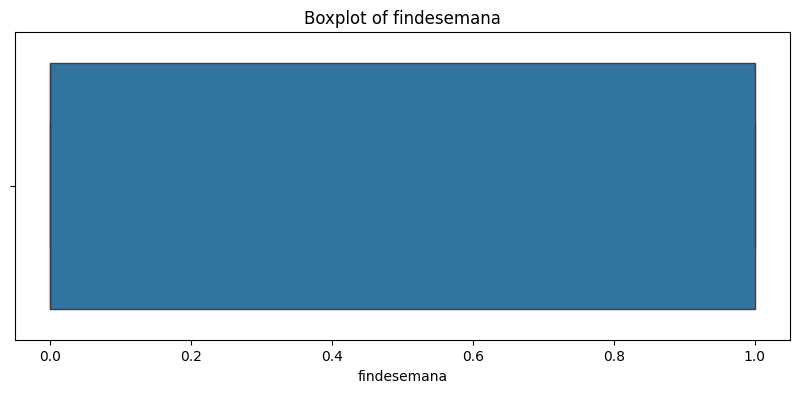

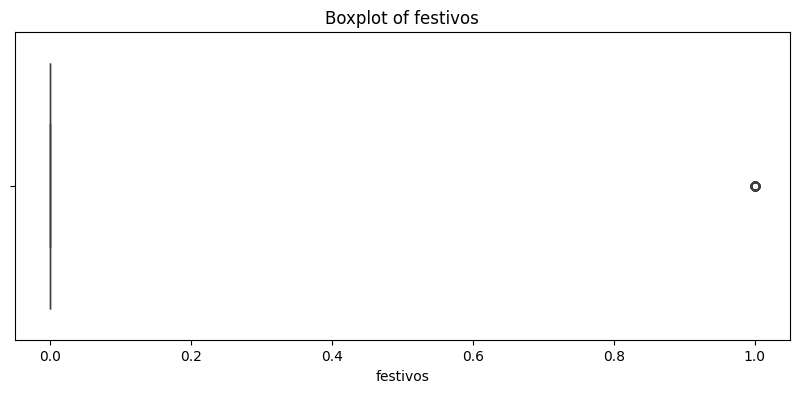

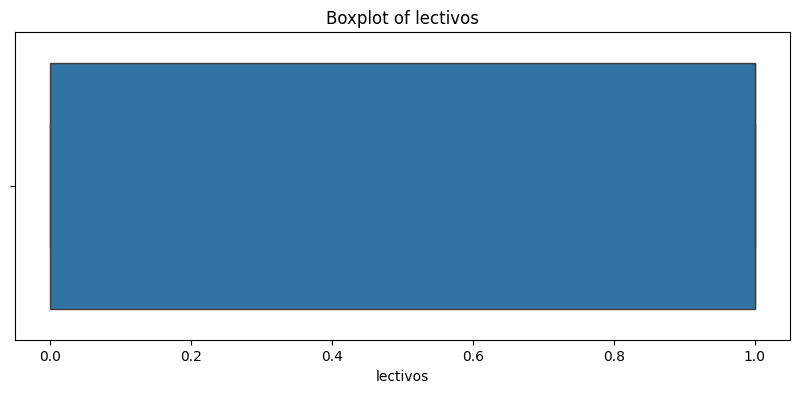

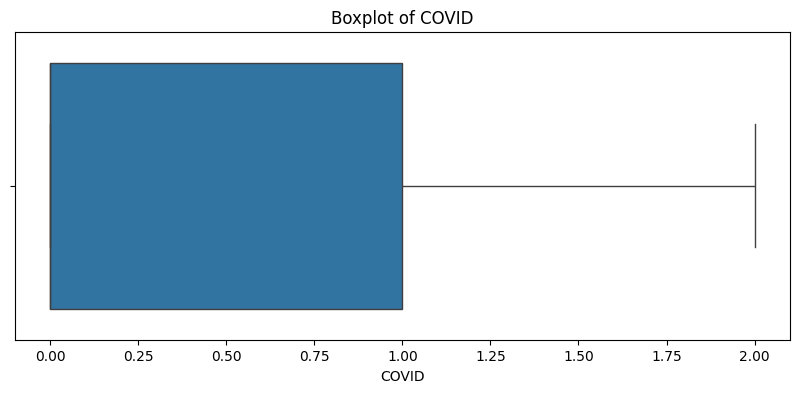

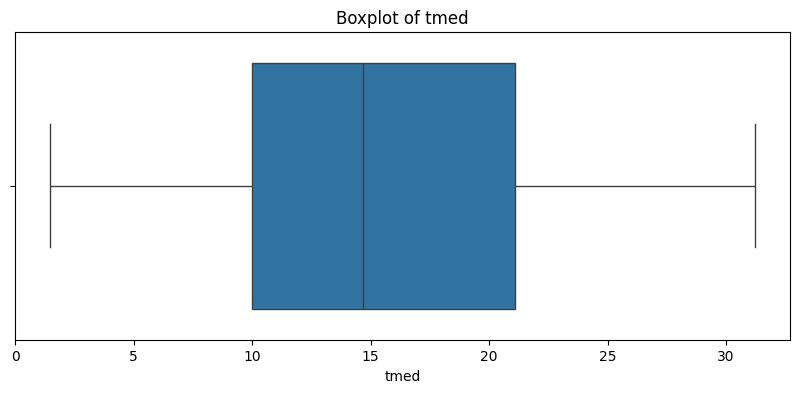

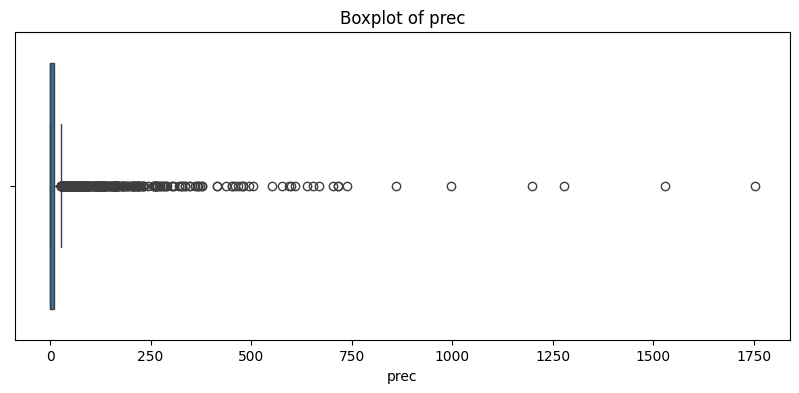

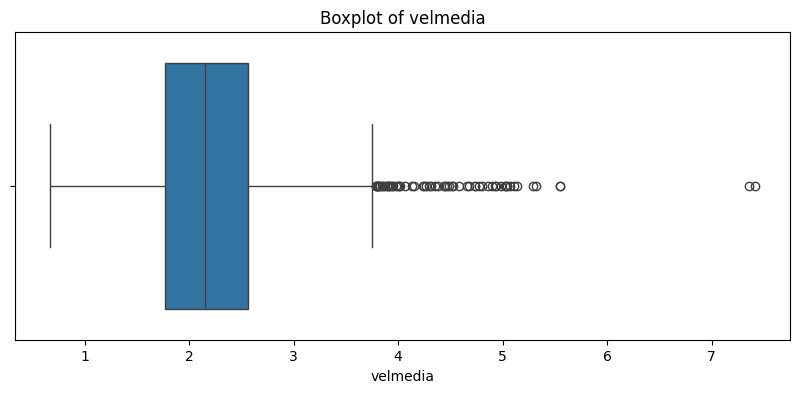

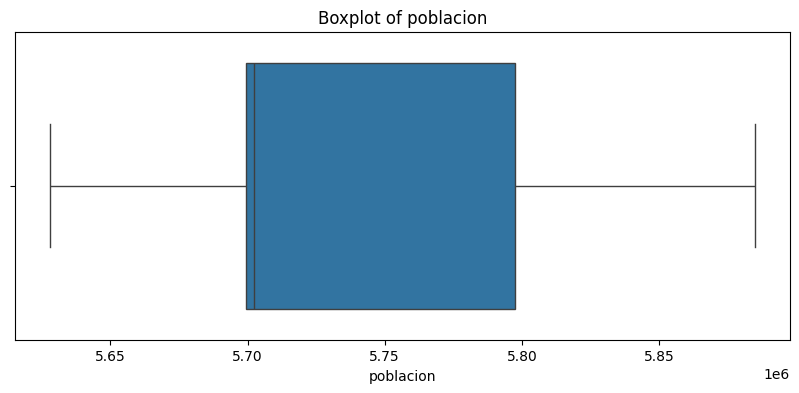

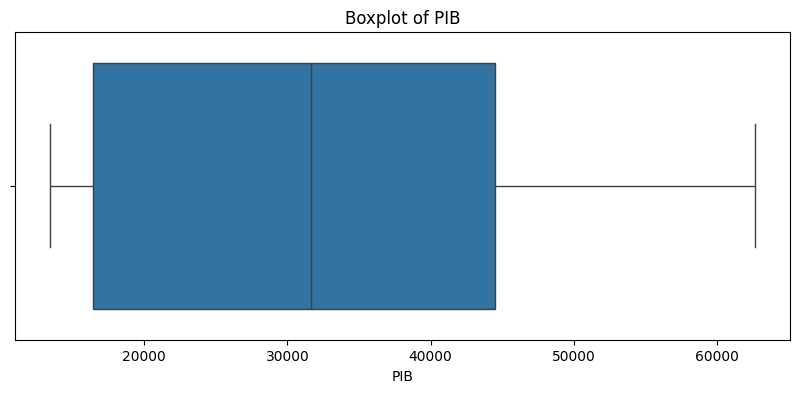

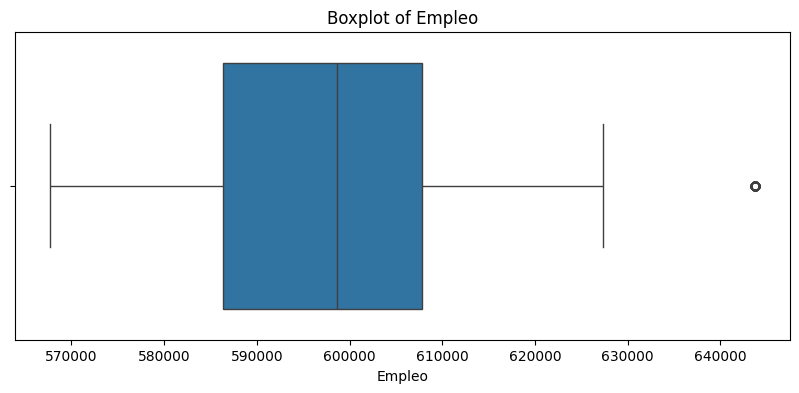

In [14]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()

In [15]:
# Supongamos que 'variable' es la columna de la que quieres obtener un resumen
print(df['prec'].describe())


count    2008.000000
mean       32.100996
std       107.301438
min         0.000000
25%         0.000000
50%         0.200000
75%        10.525000
max      1752.500000
Name: prec, dtype: float64


NORMALIZAR LAS VARIABLES CONTINUAS

In [16]:
#Normalizar las columnas numéricas
scaler = StandardScaler()
df[['consumo', 'tmed', 'prec', 'velmedia', 'poblacion', 'PIB']] = scaler.fit_transform(df[['consumo', 'tmed', 'prec', 'velmedia', 'poblacion', 'PIB']])


In [17]:
skew = df.skew(axis=0, numeric_only=True)
skew

consumo        0.759936
año            0.089586
fecha          0.000000
findesemana    0.948621
festivos       4.776828
lectivos      -0.021930
COVID          1.139768
tmed           0.187073
prec           7.407125
velmedia       1.482939
poblacion      0.746403
PIB            0.216043
Empleo         0.454800
dtype: float64

Asimetría positiva (Skew > 0): La cola derecha de la distribución es más larga o tiene más valores extremos. Esto indica que los valores grandes son más frecuentes o se alejan más del centro.

Asimetría negativa (Skew < 0): La cola izquierda de la distribución es más larga. Los valores pequeños son más frecuentes o se alejan más del centro.

Asimetría cercana a 0: Indica que la distribución es más o menos simétrica, lo que significa que los datos están equilibrados alrededor de la media.

---------------------

- Variables con alta asimetría:

festivos: Tiene una asimetría muy alta (4.776828), lo que sugiere que la mayoría de los valores son cercanos a un valor, pero algunos valores extremos están muy por encima.

prec (precipitación): Tiene una asimetría positiva extremadamente alta (7.407125), lo que sugiere que la mayoría de los días tienen poca o ninguna precipitación, pero algunos días tienen valores extremadamente altos.

velmedia (velocidad media del viento): Con una asimetría de 1.482939, también muestra una asimetría positiva moderada.

bono_social: Tiene una asimetría negativa considerable (-1.303788), lo que indica que la mayoría de los valores son bajos (o cercanos a 0), con pocos valores altos.

- Variables con asimetría cercana a 0:

PIB (-0.019585): Tiene una asimetría cercana a cero, lo que sugiere que los valores del PIB están bastante equilibrados.

lectivos (-0.021930): Tiene una asimetría muy cercana a 0, lo que indica una distribución simétrica.

------------------------

Altamente asimétricas: Las variables como prec, velmedia, y festivos pueden requerir una transformación para mejorar la capacidad de modelado.

Suficientemente simétricas: Variables como PIB, lectivos, y año parecen estar bien distribuidas y no necesitan ser transformadas.

TRANSFORMACIÓN DE VARIABLES CON ALTA ASIMETRIA

Transformación logarítimica de pred y velmedia, porque tienen una alta asimetría (skew) positiva.

In [47]:
df['prec_log'] = np.log1p(df['prec'])  # log1p es log(1 + x) para evitar problemas con ceros
df['velmed_log'] = np.log1p(df['prec'])  # log1p es log(1 + x) para evitar problemas con ceros

In [18]:
my_list = []
for key, value in skew.items():  # Usamos .items() para obtener el nombre de las columnas
    if value > 1:
        my_dict = {key: value}  # Asociamos el nombre de la columna (key) con el valor de skewness (value)
        my_list.append(my_dict)
        
print(my_list)


[{'festivos': 4.776828378782333}, {'COVID': 1.1397676543831787}, {'prec': 7.40712474634465}, {'velmedia': 1.4829386760641927}]


## Paso 2:  Definición de la arquitectura de la red neuronal

1. Dividir los datos en características y objetivo

In [19]:
# Definir características (X) y objetivo (y)
X = df.drop(columns=['consumo', 'Sector_Economic', 'año'])  
y = df['consumo']  

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train

,fecha,findesemana,festivos,lectivos,COVID,tmed,prec,velmedia,poblacion,PIB,Empleo
1249,1654214400,0,0,1,0,1.240148,-0.299241,-0.005490,-0.470845,0.675653,643700
261,1568851200,0,0,1,0,1.005489,0.031685,-0.674296,-0.927577,-0.350552,600300
607,1598745600,1,0,0,2,0.365280,0.502439,0.548484,-0.433294,-0.471801,573300
973,1630368000,0,0,0,2,1.030832,0.386848,0.426326,-0.451277,-0.404125,599200
240,1567036800,0,0,0,0,1.432963,-0.276869,-0.360886,-0.927577,-0.350552,600300
...,...,...,...,...,...,...,...,...,...,...,...
1130,1643932800,0,0,1,0,-0.921000,-0.299241,-1.167415,-0.470845,1.585889,581700
1294,1658102400,0,0,0,0,1.763438,-0.299241,0.139396,0.181627,-0.262593,627300
860,1620604800,0,0,1,2,0.145996,-0.060601,-0.102379,-0.435437,0.481449,578500
1459,1672358400,0,0,0,0,-0.562824,-0.297377,-0.746963,0.181627,-1.218612,607800


In [21]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
print(X.isnull().sum())

fecha          0
findesemana    0
festivos       0
lectivos       0
COVID          0
tmed           0
prec           0
velmedia       0
poblacion      0
PIB            0
Empleo         0
dtype: int64


2. Construir el modelo de red neuronal

In [23]:
# Inicializar el modelo
modelInd = Sequential()

# Añadir la capa de entrada
modelInd.add(Input(shape=(X_train.shape[1],)))  # Define la forma de entrada aquí

# Añadir la primera capa oculta
modelInd.add(Dense(units=64, activation='relu'))

# Añadir una segunda capa oculta (opcional)
modelInd.add(Dense(units=32, activation='relu'))

# Capa de salida
modelInd.add(Dense(units=1))  # Para una regresión, una sola neurona sin función de activación

# Compilar el modelo
modelInd.compile(optimizer='adam', loss='mean_squared_error')


3. Entrenar el modelo

In [24]:
X_train = np.array(X_train)  # Convertir X_train a un array de NumPy
y_train = np.array(y_train)  # Convertir y_train a un array de NumPy
X_test = np.array(X_test)  # Asegurarse de que sea un array de NumPy
y_test = np.array(y_test)  # Asegurarse de que sea un array de NumPy

In [25]:

print(np.isnan(X_train).sum(), np.isnan(y_train).sum())  # Verifica si hay NaN en los datos
print(np.isnan(X_test).sum(), np.isnan(y_test).sum())  # Verifica si hay NaN en los datos


0 0
0 0


In [26]:
# Verifico la dimensión de los datos.

print(X_train.shape)  # Debe ser (n_samples, n_features)
print(y_train.shape)  # Debe ser (n_samples,)


(1606, 11)
(1606,)


In [27]:
# Entrenar el modelo
history = modelInd.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100


41/41 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1094552953815040.0000 - val_loss: 148136181760.0000
Epoch 2/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8334734262272.0000 - val_loss: 23456915456.0000
Epoch 3/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 139763220480.0000 - val_loss: 30956092.0000
Epoch 4/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2004374656.0000 - val_loss: 127148984.0000
Epoch 5/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51949536.0000 - val_loss: 18254176.0000
Epoch 6/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19672848.0000 - val_loss: 16069320.0000
Epoch 7/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18265850.0000 - val_loss: 19407302.0000
Epoch 8/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 22937074.0000 - val_loss: 17057642.0000
Epoch 9/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18706576.0000 - val_loss: 28127522.0000
Epoch 10/100
41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20051634.0000 - val_loss: 27477402

4. Evaluar el modelo

In [28]:
# Evaluar el modelo
test_loss = modelInd.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 933us/step - loss: 234242129920.0000
Test Loss: 234494689280.0


## Paso 3: Evaluación del modelo y predicciones

1. Visualizar la pérdida durante el entrenamiento

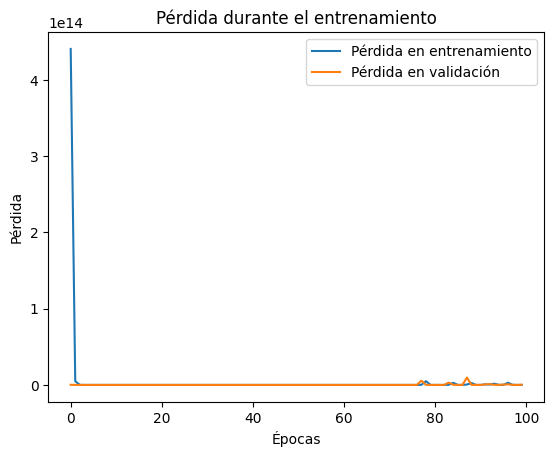

In [29]:
# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Pérdida en entrenamiento')
plt.plot(history.history['val_loss'], label='Pérdida en validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

2. Evaluar el modelo en el conjunto de prueba

In [30]:
# Evaluar el modelo en el conjunto de prueba
test_loss = modelInd.evaluate(X_test, y_test)
print(f'Pérdida en el conjunto de prueba: {test_loss}')

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 770us/step - loss: 234242129920.0000
Pérdida en el conjunto de prueba: 234494689280.0


3. Hacer predicciones

 2/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/stepp

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


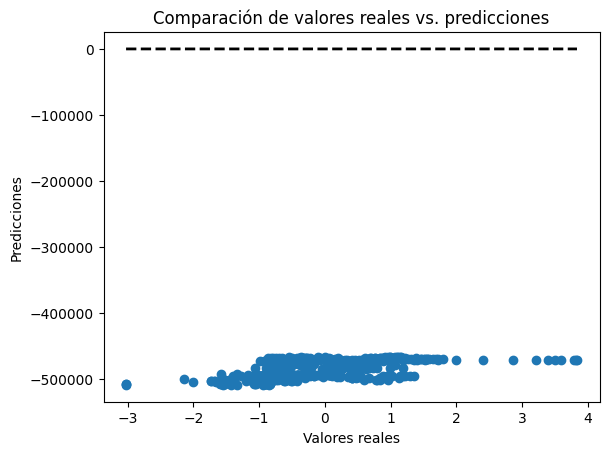

In [32]:
# Hacer predicciones
predicciones = modelInd.predict(X_test)

# Comparar predicciones con los valores reales
plt.scatter(y_test, predicciones)
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Comparación de valores reales vs. predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Línea de identidad
plt.show()

4. Calcular métricas adicionales

In [33]:
mae = mean_absolute_error(y_test, predicciones)
rmse = mean_squared_error(y_test, predicciones, squared=False)

print(f'Error Absoluto Medio (MAE): {mae}')
print(f'Raíz del Error Cuadrático Medio (RMSE): {rmse}')


Error Absoluto Medio (MAE): 484060.6392146722
Raíz del Error Cuadrático Medio (RMSE): 484246.53032917134


/home/vscode/.local/lib/python3.10/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
#Extraccion del modelo a una crapeta
# Guardar el modelo entrenado en una carpeta
modelInd.save('../models/modelo_industrial.h5')


## Paso 4: Optimización del modelo

Aquí hay algunas estrategias que puedes utilizar para optimizar tu modelo:

#### 1. **Ajuste de Hiperparámetros**

- **Número de Neuronas y Capas**: Experimenta con el número de neuronas en cada capa y la cantidad de capas ocultas. Un modelo más complejo puede capturar mejor patrones en los datos, pero ten cuidado con el sobreajuste.

- **Tasa de Aprendizaje (Learning Rate)**: Ajusta la tasa de aprendizaje del optimizador. Puedes utilizar un optimizador como Adam que permite cambiar dinámicamente la tasa de aprendizaje.


### 2. **Regularización**

- **Dropout**: Introduce capas de `Dropout` para evitar el sobreajuste. Esto apaga aleatoriamente un porcentaje de neuronas durante el entrenamiento, lo que ayuda a que el modelo generalice mejor
- **Regularización L1 o L2**: Aplica técnicas de regularización a las capas densas.


#### 3. **Aumentar el número de épocas**

Aumentar el número de épocas puede ayudar a que el modelo aprenda mejor, pero asegúrate de monitorear la pérdida en el conjunto de validación para evitar el sobreajuste.


#### 4. **Early Stopping**

Implementa `EarlyStopping` para detener el entrenamiento si la pérdida en el conjunto de validación no mejora después de un número específico de épocas. Esto ayuda a evitar el sobreajuste.


#### 5. **Prueba con diferentes optimizadores**

Prueba diferentes optimizadores (como SGD, Adam, RMSprop) para ver si alguno mejora el rendimiento.


### 6. **Evaluar mejoras**

Después de aplicar algunas de estas técnicas, vuelve a evaluar el modelo utilizando el conjunto de prueba y compara el nuevo `Test Loss` y el `RMSE` con los resultados anteriores.
